# Autoencoders for Anomalous ECG Detection


To start, we import the following libraries:
- numpy: for data manipulation
- pandas: for data manipulation
- matplotlib: for data visualization
- tensorflow: for building neural networks

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

To start, we call the ECG5000 dataset using the Google API. 

In [2]:
# calling the dataset using the API
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


<AxesSubplot:xlabel='140', ylabel='count'>

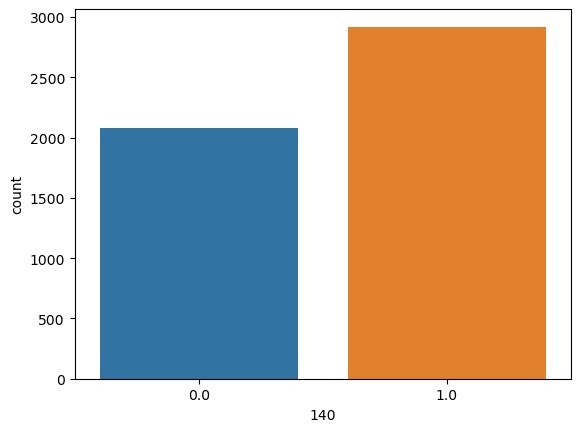

In [4]:
import seaborn as sns
sns.countplot(x=140,data=dataframe)

Next, we format the raw data and the labels and then split the dataset using the train_test_split function from the sklearn library.

In [5]:
# formatting the dataset
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

# splitting the dataset
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

After that, we scale the data values using Min Max scaling technique.

In [6]:
# scaling the data values
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

To further format the data, we convert the labels into boolean values. Next, we segregate the normal and anomalous ECG observations using the boolean values.

In [7]:
# formatting the labels
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# segregating the normal and anomalous ECG observations
normal_train_data = train_data[train_labels]
normal_test_data=test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

To have a look at the normal and anomalous ECG observations, we plot them using functions from the matplotlib library.

Text(0.5, 1.0, 'Anomalous ECG')

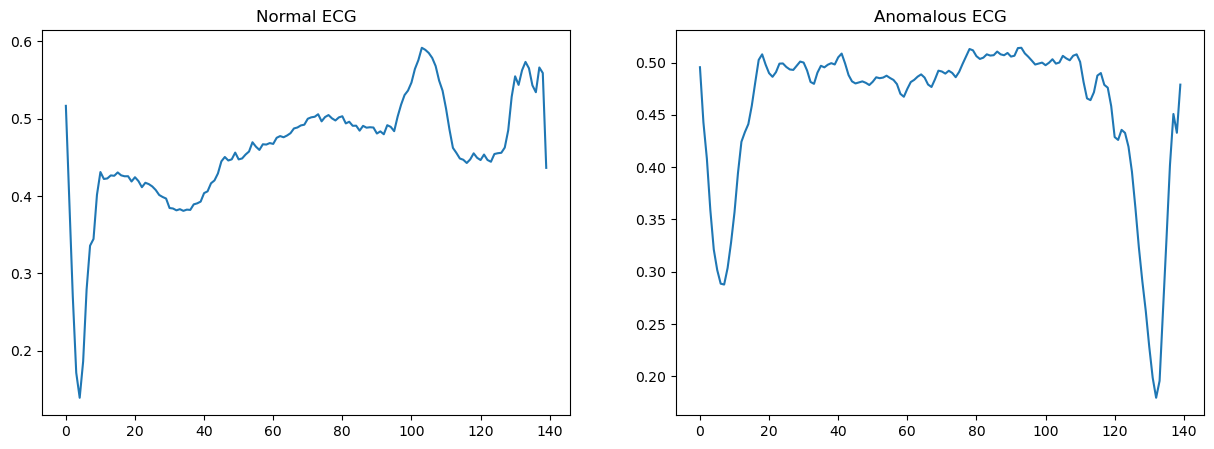

In [8]:
# plotting the normal and anomalous ECG observations
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(np.arange(140),normal_train_data[0])
ax[0].set_title('Normal ECG')
ax[1].plot(np.arange(140), anomalous_train_data[0])
ax[1].set_title('Anomalous ECG')

Next, we build the autoencoder having the following layers:
- Input: takes in the 140 dimensional ECG vector
- Encoder: consists of 5 layers which maps the 140 dimensional input to a 8 dimensional latent space
- Decoder: consists of 5 layers which maps the 8 dimensional latent space back to a 140 dimensional output ECG observation.

We then link the above layers and put together the model.

In [9]:
normal_train_data.shape

TensorShape([2328, 140])

In [10]:
# input layer
input = tf.keras.Input(shape=(140,))

# encoder layers
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
])

# decoder layers
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(140, activation='relu'),
])

# linking the layers and putting together the model
encoded = encoder(input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(input, decoded)

Next, we compile the autoencoder and fit it on the normal ECG training data. We use the adam optimizer and mean squared error for the same.

In [11]:
# compiling and training the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 74ms/step - loss: 0.2054 - val_loss: 0.1887
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1734 - val_loss: 0.1423
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1261 - val_loss: 0.1191
Epoch 4/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1150 - val_loss: 0.1037
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0983 - val_loss: 0.0965
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0932 - val_loss: 0.0908
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0881 - val_loss: 0.0884
Epoch 8/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0857 - val_loss: 0.0853
Epoch 9/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0832 - val_loss: 0.0844
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0823 - val_loss: 0.0835
Epoch 11/20
5/5 [============

Next, we find the training loss by predicting the outcome of the normal training data and calculating the mean squared error.

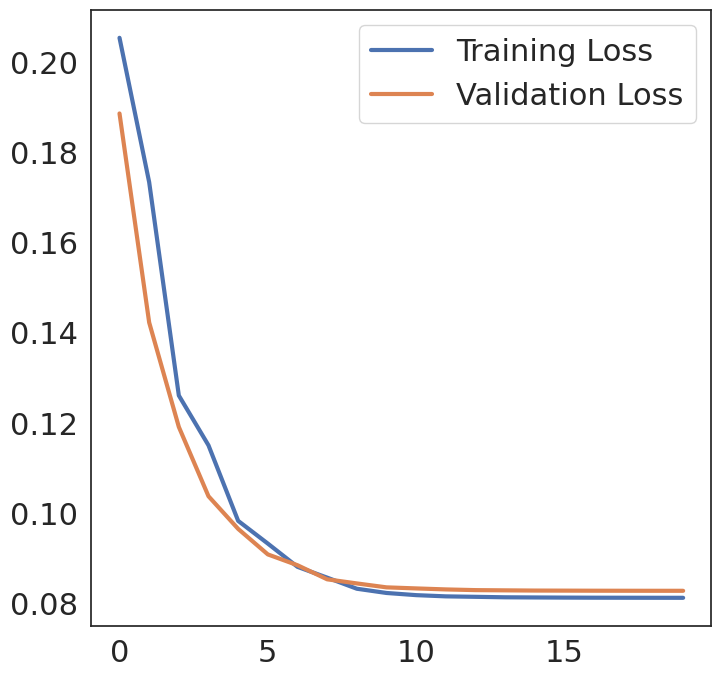

In [12]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.set_style("white")
plt.plot(history.history['loss'],label='Training Loss',linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [28]:
# calculating the training loss
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mean_squared_error(reconstructions, normal_train_data)

73/73 [==============================] - 0s 1ms/step


We use the loss calculated above to set a threshold to classify ECGs as normal or anomalous. This threshold is the mean of the training loss added to the standard deviation of the same.

In [29]:
# calculating the threshold
threshold = np.mean(train_loss) + np.std(train_loss)

Next, we predict the values of the entire test data. To classify the anomalous observations from the test data, we check if our reconstruction error is more than the threshold. If it is, it is classified as anomalous.

In [30]:
# predicting from test
reconstructed_test = autoencoder.predict(test_data)

# classifying as anomalous
losses = tf.keras.losses.mean_squared_error(reconstructed_test, test_data)
anomalies = tf.math.less(losses, threshold)

32/32 [==============================] - 0s 2ms/step


To check how well we've classified the anomalous ECGs, we calculate the classfication metrics.

In [31]:
# calculating the classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(str.format('Accuracy: {:.2f}', accuracy_score(test_labels, anomalies)))
print(str.format('Precision: {:.2f}', precision_score(test_labels, anomalies)))
print(str.format('Recall: {:.2f}', recall_score(test_labels, anomalies)))

Accuracy: 0.88
Precision: 0.88
Recall: 0.92


As we can see, the accuracy is 88%, precision is 0.98, and recall is 0.82. This means that the model performs decently.